# Interprétabilité

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Modèles linéaires

Les modèles linéaires sont les modèles les plus simples à interpréter. A performance équivalente, il faut toujours choisir le modèle le plus simple. Le module [scikit-learn](http://scikit-learn.org/) ne propose pas les outils standards d'analyse des modèles linéaires (test de nullité, valeur propre). Il faut choisir [statsmodels](http://statsmodels.sourceforge.net/) pour obtenir ces informations.

In [ ]:
import numpy
import statsmodels.api as smapi
nsample = 100
x = numpy.linspace(0, 10, 100)
X = numpy.column_stack((x, x**2 - x))
beta = numpy.array([1, 0.1, 10])
e = numpy.random.normal(size=nsample)
X = smapi.add_constant(X)
y = X @ beta + e

In [ ]:
model = smapi.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.617e+06
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          4.74e-237
Time:                        16:22:52   Log-Likelihood:                -142.08
No. Observations:                 100   AIC:                             290.2
Df Residuals:                      97   BIC:                             298.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.8510      0.299      2.844      0.005         0.257     1.445
x1             0.0796      0.125      0.635      0.527        -0.169     0.328
x2            10.0066      0.013    747.901      0.000         9.980    10.033
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.138
Skew:                           0.028   Prob(JB):                        0.933
Kurtosis:                       2.826   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Arbres (tree)

### Lectures

* [treeinterpreter](https://github.com/andosa/treeinterpreter)
* [Making Tree Ensembles Interpretable](https://arxiv.org/pdf/1606.05390v1.pdf) : l'article propose de simplifier une random forest en approximant sa sortie par une somme pondérée d'arbre plus simples.
* [Understanding variable importances in forests of randomized trees](http://papers.nips.cc/paper/4928-understanding-variable-importances-in-forests-of-randomized-trees.pdf) : cet article explique plus formellement le calcul des termes ``feature_importances_`` calculés par scikit-learn pour chaque arbre et forêts d'arbres (voir aussi [Random Forests, Leo Breiman and Adele Cutler](http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm))

### Module treeinterpreter

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=3)
clf2.fit(X, Y)
Yp2 = clf2.predict(X)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf2, out_file="arbre.dot")

In [ ]:
import os
cwd = os.getcwd()
from pyquickhelper.helpgen import find_graphviz_dot
dot = find_graphviz_dot()
os.system ("\"{1}\" -Tpng {0}\\arbre.dot -o {0}\\arbre.png".format(cwd, dot))

0

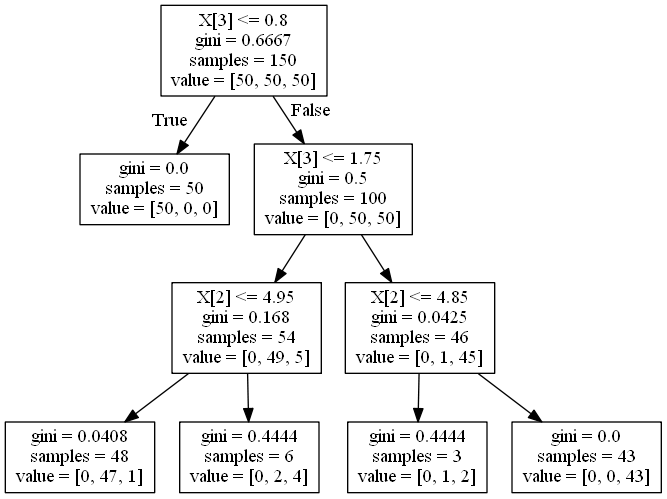

In [ ]:
from IPython.display import Image
Image("arbre.png")

In [ ]:
from treeinterpreter import treeinterpreter
pred, bias, contrib = treeinterpreter.predict(clf2, X[106:107,:])

In [ ]:
X[106:107,:]

array([[ 4.9,  2.5,  4.5,  1.7]])

In [ ]:
pred

array([[ 0.        ,  0.97916667,  0.02083333]])

In [ ]:
bias

array([[ 0.33333333,  0.33333333,  0.33333333]])

In [ ]:
contrib

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.07175926, -0.07175926],
        [-0.33333333,  0.57407407, -0.24074074]]])

``pred`` est identique à ce que retourne la méthode ``predict`` de scikit-learn. ``bias`` est la proportion de chaque classe. ``contrib`` est la somme des contributions de chaque variable à chaque classe. On note $X=(x_1, ..., x_n)$ une observation.

$$P(X \in classe(i)) = \sum_i contrib(x_k,i)$$

Le [code](https://github.com/andosa/treeinterpreter/blob/master/treeinterpreter/treeinterpreter.py) est assez facile à lire et permet de comprendre ce que vaut la fonction $contrib$.

### Exercice 1 : décrire la fonction contrib

La lecture de [Understanding variable importances
in forests of randomized trees](http://papers.nips.cc/paper/4928-understanding-variable-importances-in-forests-of-randomized-trees.pdf) devrait vous y aider.

In [ ]:
clf2.feature_importances_

array([ 0.        ,  0.        ,  0.05393633,  0.94606367])

### Exercice 2 : implémenter l'algorithme

Décrit dans [Making Tree Ensembles Interpretable](https://arxiv.org/pdf/1606.05390v1.pdf)

## Interprétation et corrélation

### Modèles linéaires

Les modèles linéaires n'aiment pas les variables corrélées. Dans l'exemple qui suit, les variables $X_2, X_3$ sont identiques. La régression ne peut retrouver les coefficients du modèle initial (2 et 8).

In [ ]:
import numpy
import statsmodels.api as smapi
nsample = 100
x = numpy.linspace(0, 10, 100)
X = numpy.column_stack((x, (x-5)**2, (x-5)**2))  # ajout de la même variable
beta = numpy.array([1, 0.1, 2, 8])
e = numpy.random.normal(size=nsample)
X = smapi.add_constant(X)
y = X @ beta + e

In [ ]:
import pandas
pandas.DataFrame(numpy.corrcoef(X.T))

c:\python35_x64\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\python35_x64\lib\site-packages\numpy\lib\function_base.py:2571: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,1.000000e+00,4.487258e-17,4.487258e-17
2,NaN,4.487258e-17,1.000000e+00,1.000000e+00
3,NaN,4.487258e-17,1.000000e+00,1.000000e+00


In [ ]:
model = smapi.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.686e+05
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          2.76e-182
Time:                        16:23:22   Log-Likelihood:                -144.18
No. Observations:                 100   AIC:                             294.4
Df Residuals:                      97   BIC:                             302.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9366      0.237      3.957      0.000         0.467     1.406
x1             0.0796      0.036      2.234      0.028         0.009     0.150
x2             5.0074      0.007    732.980      0.000         4.994     5.021
x3             5.0074      0.007    732.980      0.000         4.994     5.021
==============================================================================
Omnibus:                        4.993   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.639
Skew:                          -0.525   Prob(JB):                       0.0983
Kurtosis:                       3.098   Cond. No.                     4.31e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Arbre / tree

Les arbres de décision n'aiment pas plus les variables corrélées.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2]
Y = iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [ ]:
clf1.feature_importances_

array([ 0.76759205,  0.23240795])

On recopie la variables $X_1$.

In [ ]:
import numpy
X2 = numpy.hstack([X, numpy.ones((X.shape[0], 1))])
X2[:,2] = X2[:,0]

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=3)
clf2.fit(X2, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [ ]:
clf2.feature_importances_

array([ 0.74371969,  0.23240795,  0.02387236])

On voit que l'importance de la variable 1 est diluée sur deux variables.

### Exercice 3 : variables corrélées pour un arbre de décision

Un arbre de décision est composé d'un ensemble de fonctions de seuil. Si $X_i > s_i$ alors il faut suivre cette branche, sinon, telle autre. Les arbres de décision ne sont pas sensibles aux problèmes d'échelle de variables. Si deux variables sont corrélées $cor(X_1, X_2)= 1$, l'arbre subit les mêmes problèmes qu'un modèle linéaire. Dans le cas linéaire, il suffit de changer l'échelle $(X_1, \ln X_2)$ pour éviter ce problème. 

* Pourquoi cette transformation ne change rien pour un arbre de décision ?
* Quelle corrélation il faudrait calculer pour repérer les variables identiques selon le point de vue d'un arbre de décision ?